In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle


from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
adver = pd.read_csv("Advertisment.csv")
adver.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#adver = adver.drop("Unnamed: 0", axis =1)

In [4]:
adver = adver.rename(columns={"Unnamed: 0":"SN"})

In [5]:
adver

,SN,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
print(adver.columns)
print("\n")
print(adver.info())
print("\n")
print(adver.dtypes)

Index(['SN', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SN         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


SN             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [7]:
adver.tail()

,SN,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
adver.shape

(200, 5)

In [9]:
adver.dtypes

SN             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
adver.describe()

,SN,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


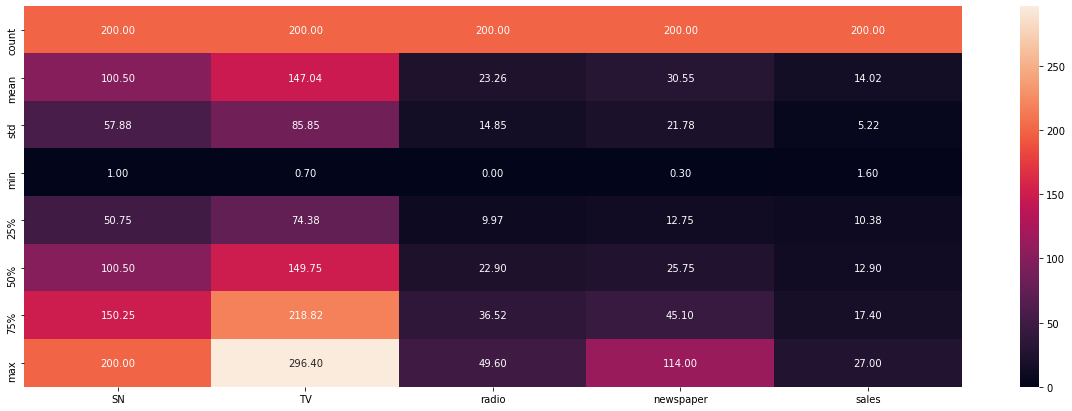

In [11]:
plt.figure(figsize = (21, 7))
sns.heatmap(adver.describe(), annot=True, linecolor = "white", fmt = "0.2f")


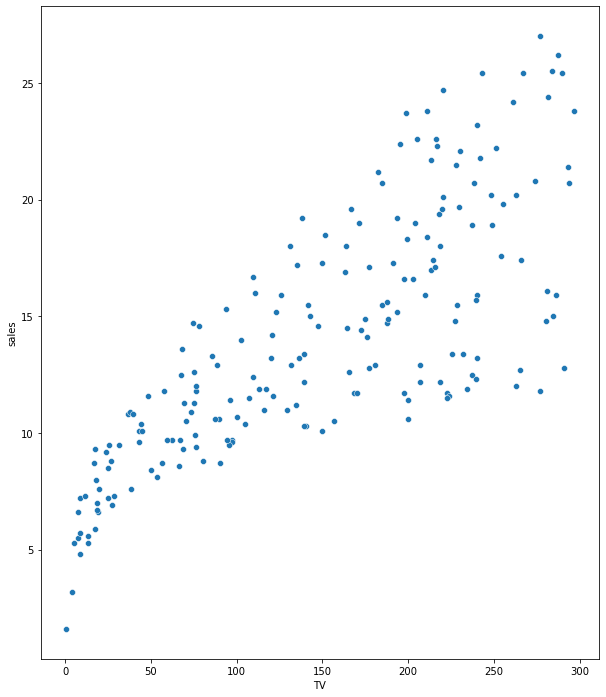

In [12]:
fig, ax = plt.subplots(figsize = ( 10 , 12 )) 
sns.scatterplot(x ="TV", y="sales", data=adver)

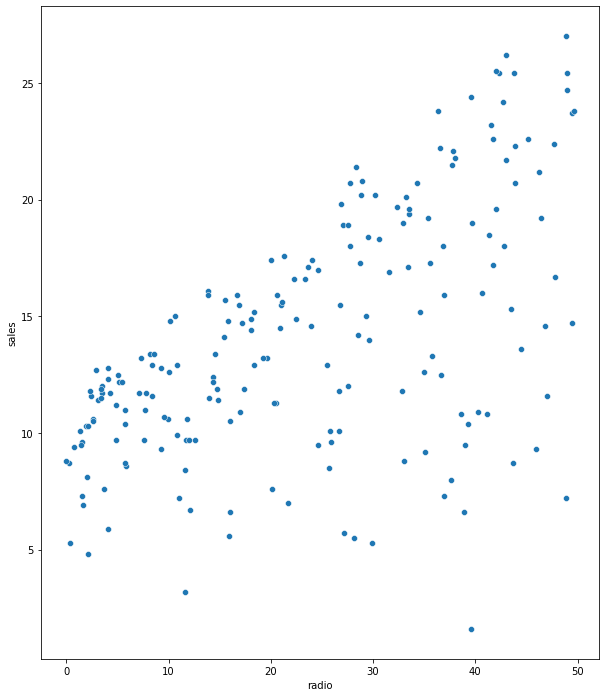

In [13]:
fig, ax = plt.subplots(figsize = ( 10 , 12 )) 
sns.scatterplot(x ="radio", y="sales", data=adver)

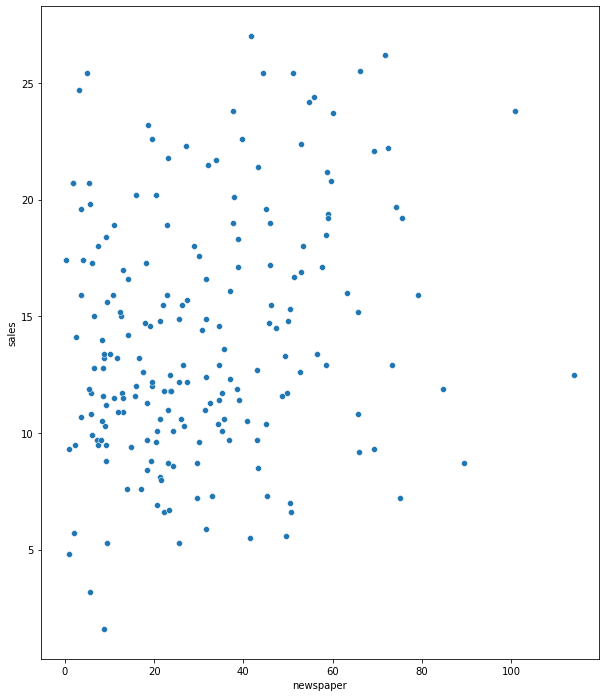

In [14]:
fig, ax = plt.subplots(figsize = ( 10 , 12 )) 
sns.scatterplot(x ="newspaper", y="sales", data=adver)

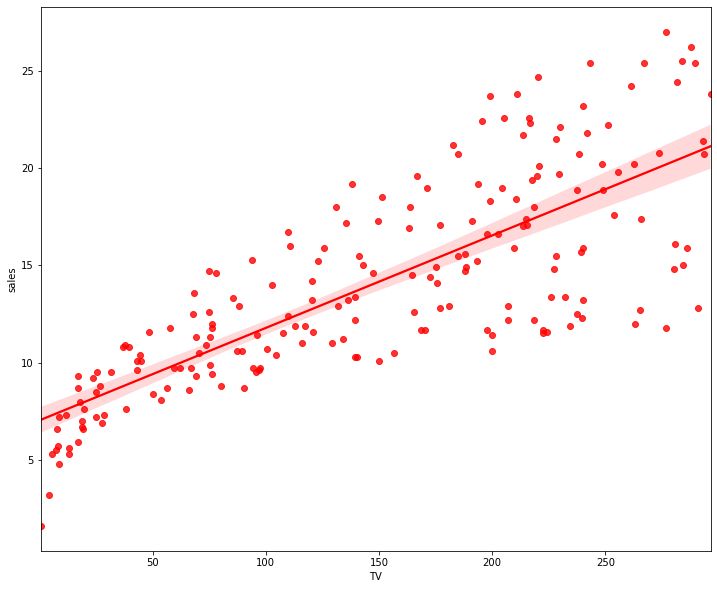

In [15]:
fig, ax = plt.subplots(figsize = ( 12 , 10 )) 
sns.regplot(x="TV", y="sales", data=adver, color ="r")

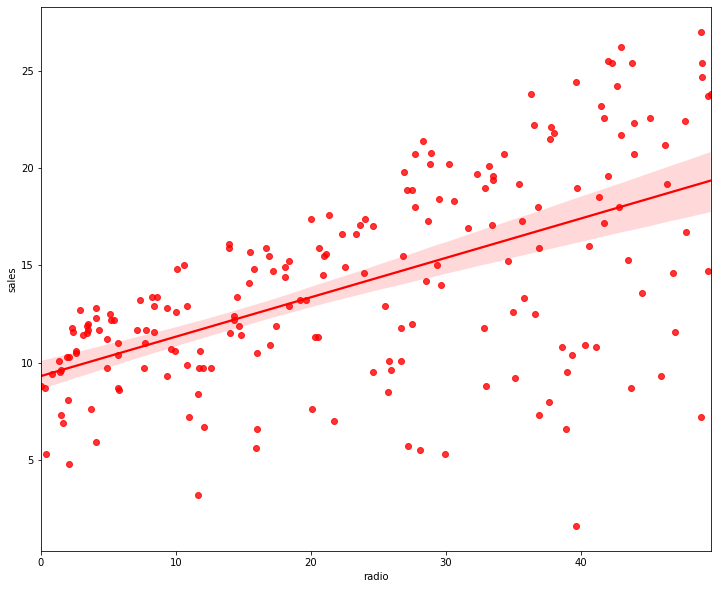

In [16]:
fig, ax = plt.subplots(figsize = ( 12 , 10 )) 
sns.regplot(x="radio", y="sales", data=adver, color ="r")

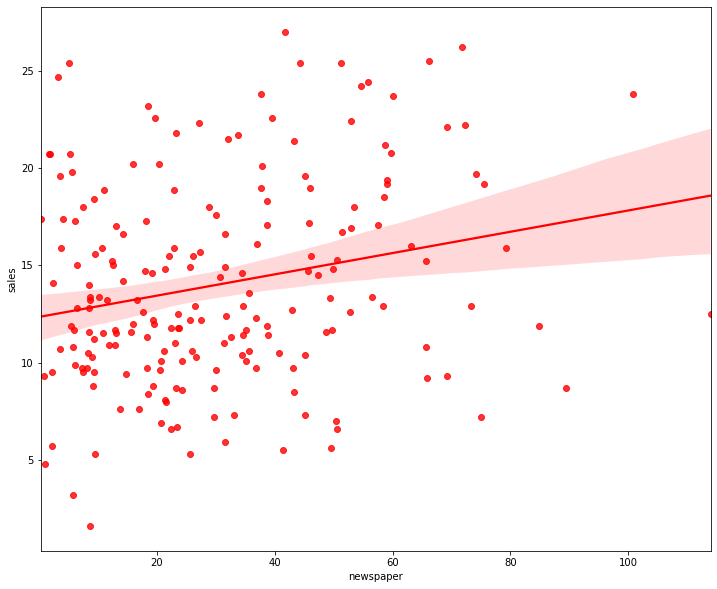

In [17]:
fig, ax = plt.subplots(figsize = ( 12 , 10 )) 
sns.regplot(x="newspaper", y="sales", data=adver, color ="r")        
            
            
            
          

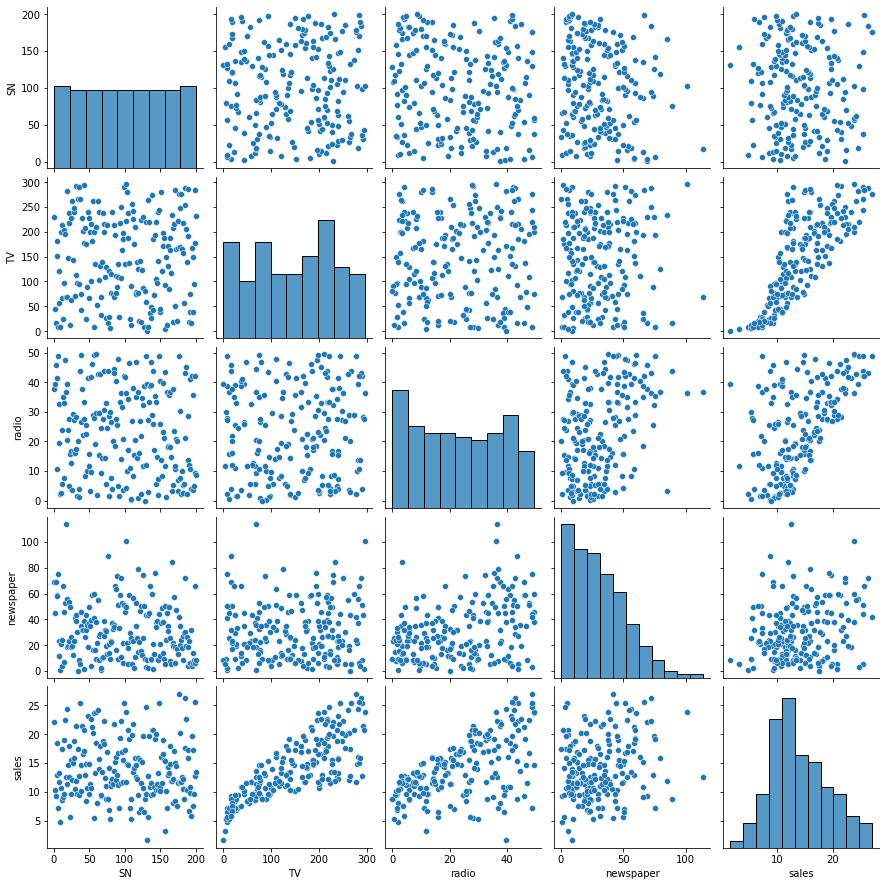

In [18]:
sns.pairplot(adver, diag_kind = "hist")

In [19]:
adver.isnull().sum()

SN           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

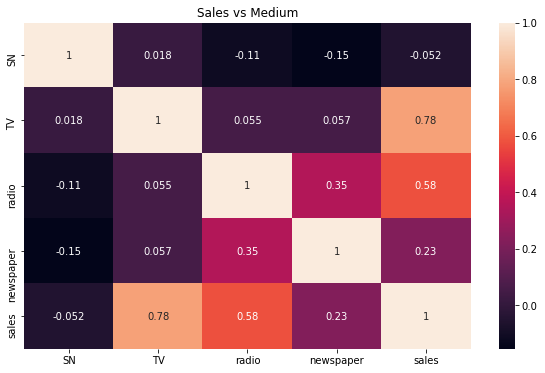

In [20]:
corr_mat = adver.corr()
plt.figure(figsize = [10,6])
sns.heatmap(corr_mat, annot=True)
plt.title("Sales vs Medium")
plt.show()

In [21]:
corr_mat["sales"].sort_values(ascending = False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
SN          -0.051616
Name: sales, dtype: float64

In [22]:
adver.skew()

SN           0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

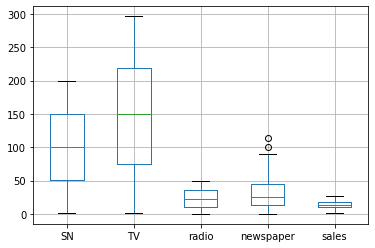

In [23]:
adver.boxplot()

In [24]:
x_one = adver[['SN','TV']]
x_two = adver[['SN',"radio"]]
news = adver[['SN','newspaper']]
y = adver['sales']

In [25]:
x_one.isnull().sum()

SN    0
TV    0
dtype: int64

In [26]:
print("Tv :", x_one.shape)
print("radio :", x_two.shape)
print("newspaper :", news.shape)
print("sales :", y.shape)

Tv : (200, 2)
radio : (200, 2)
newspaper : (200, 2)
sales : (200,)


In [27]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_one,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.7558229557659701  on Random State  874


In [28]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_two,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.5037863282896413  on Random State  819


In [29]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(news,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.10938837412429092  on Random State  82


In [30]:
 xone_train,xone_test,yone_train,yone_test = train_test_split(x_one,y,test_size = .30, random_state = 874)

In [31]:
# LINEAR REGRESSION
from sklearn.metrics import mean_squared_error, mean_absolute_error
LR = LinearRegression()
LR.fit(xone_train, yone_train)
predlr = LR.predict(xone_test)
print(r2_score(yone_test, predlr))
print('error')
print("Mean absolute error: ", mean_absolute_error(yone_test,predlr))
print("Mean squared error: ", mean_squared_error(yone_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(yone_test, predlr)))


0.7558229557659701
error
Mean absolute error:  1.9856273571004384
Mean squared error:  7.072839724248147
Root Mean Squared Error:  2.659481100562316


In [32]:
 xtwo_train,xtwo_test,ytwo_train,ytwo_test = train_test_split(x_two,y,test_size = .30, random_state = 442)

In [33]:
# LINEAR REGRESSION
from sklearn.metrics import mean_squared_error, mean_absolute_error
LR = LinearRegression()
LR.fit(xtwo_train, ytwo_train)
predlr = LR.predict(xtwo_test)
print(r2_score(ytwo_test, predlr))
print('error')
print("Mean absolute error: ", mean_absolute_error(ytwo_test,predlr))
print("Mean squared error: ", mean_squared_error(ytwo_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(ytwo_test, predlr)))


0.49978594728670755
error
Mean absolute error:  2.9851476344140226
Mean squared error:  14.471608000555998
Root Mean Squared Error:  3.804156674028555


In [34]:
 xnews_train,xnews_test,ynews_train,ynews_test = train_test_split(news,y,test_size = .30, random_state = 716)

In [35]:
# LINEAR REGRESSION
from sklearn.metrics import mean_squared_error, mean_absolute_error
LR = LinearRegression()
LR.fit(xnews_train, ynews_train)
predlr = LR.predict(xnews_test)
print(r2_score(ynews_test, predlr))
print('error')
print("Mean absolute error: ", mean_absolute_error(ynews_test,predlr))
print("Mean squared error: ", mean_squared_error(ynews_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(ynews_test, predlr)))


0.09943808935110443
error
Mean absolute error:  3.5499882027736915
Mean squared error:  19.41414106206935
Root Mean Squared Error:  4.406148098063586


- Considering the accuracy score for tv, radio and news paper. The proper channel to predict right sales to generate good revenue in TV. we can choose the model for hyper parameter tunning.

In [36]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x_one, y, cv = 5)
print("the cross validation score of Linear regression model :", scr.mean())

the cross validation score of Linear regression model : 0.5837608386888731


In [37]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x_two, y, cv = 5)
print("the cross validation score of Linear regression model :", scr.mean())

the cross validation score of Linear regression model : 0.2846897371683247


In [38]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, news, y, cv = 5)
print("the cross validation score of Linear regression model :", scr.mean())

the cross validation score of Linear regression model : 0.006131985767111869


In [39]:
xone_test.shape

(60, 2)

# The Telivision platform might be the best prediciton medium for sales

In [40]:
# using lassoCrossValidation
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [41]:
cv = RepeatedKFold(n_splits= 10, n_repeats=3, random_state = 247)
lasso_cv = LassoCV(alphas= arange(0,1,0.01), cv=cv,n_jobs=-1)
lasso_cv.fit(xone_train,yone_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=247),
        n_jobs=-1)

In [42]:
lasso_cv.alpha_

0.98

In [43]:
lassopred = lasso_cv.predict(xone_test)

In [44]:
lassopred

array([17.10913384,  8.70924654, 10.75789566,  9.81951453, 10.3729561 ,
       13.24943788,  7.45078136, 18.17972962,  8.99328504, 11.01482977,
        9.90497502, 11.78369536, 16.83198666, 17.23979298,  7.69017741,
       11.33315702, 13.77407303, 10.58897686, 15.52907677, 14.79595657,
        7.59958595, 17.32580967,  7.73476865, 12.18275825, 11.3421565 ,
       12.24398709,  7.81354978, 17.10204835,  8.01870829, 18.62399116,
       14.79721193, 14.36914489, 11.63846267, 19.7573784 , 20.56867231,
        8.34678539,  8.20833448, 11.39388443, 18.10221097,  8.15962582,
        7.60496942, 12.32020273,  7.44359345,  8.14765829, 19.80026049,
       15.87087818, 19.86078306, 14.73452644, 16.15768346, 15.20778857,
       12.10031348, 18.0040838 ,  8.54560878, 10.38658511, 18.38252749,
        9.55085828, 20.04372633, 19.5085803 , 19.48906994, 17.36210414])

In [45]:
lasso_cv.score(xone_train, yone_train)

0.5443347155856215

In [46]:
lasso_cv.score(xone_test, yone_test)

0.7553751613037434

In [47]:
joblib.dump(lasso_cv,"lasso_cvTV.pkl")

['lasso_cvTV.pkl']

In [48]:
joblib.dump(lasso_cv,"lasso_cvTV.obj")

['lasso_cvTV.obj']

In [49]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lassopred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,15.9,17.109134
1,15.0,8.709247
2,21.4,10.757896
3,11.8,9.819515
4,24.7,10.372956
5,13.2,13.249438
6,11.7,7.450781
7,23.7,18.179730
8,15.5,8.993285
9,11.5,11.014830


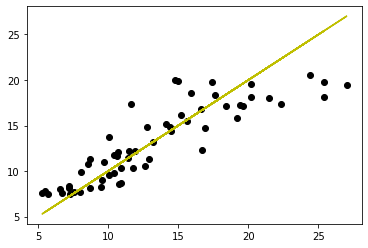

In [50]:
plt.scatter(x=yone_test, y=lassopred, color = "black")
plt.plot(yone_test,yone_test, color='y')
plt.show()